Frida Lizett Zavala Pérez

A01275226

Inteligencia artificial avanzada para la ciencia de datos I (Gpo 101)

# Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

## Red Neuronal
Este análisis proporcionará una perspectiva  del desempeño del modelo de red neuronal, se examinarán los resultados en términos de precisión, sensibilidad, especificidad y otras métricas relevantes, lo que permitirá tomar decisiones informadas sobre su implementación, ajuste de hiperparámetros y posibles áreas de mejora.

El conjunto de datos recuperado de kaggle es sobre predicción de diabetes es una colección de datos médicos y demográficos de pacientes, junto con su estado de diabetes (positivo o negativo). Los datos incluyen características como la edad, el género, el índice de masa corporal (IMC), la hipertensión, enfermedades cardíacas, antecedentes de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre. Este conjunto de datos se puede utilizar para construir modelos de aprendizaje automático que predigan la diabetes en pacientes en función de su historial médico e información demográfica. Esto puede ser útil para profesionales de la salud para identificar pacientes que pueden estar en riesgo de desarrollar diabetes y para desarrollar planes de tratamiento personalizados. Además, los investigadores pueden utilizar el conjunto de datos para explorar las relaciones entre varios factores médicos y demográficos y la probabilidad de desarrollar diabetes.

Librerias a utilizar.

* NumPy: se usa para operaciones numéricas y matrices eficientes en Python.

* Pandas: se emplea para el manejo y análisis de datos tabulares en Python.

* Matplotlib: con ella creamos gráficos y visualizaciones en Python.

* Sklearn: se utiliza para el aprendizaje automático y análisis de datos en Python. Proporciona herramientas y funciones para tareas como clasificación, regresión, clustering y preprocesamiento de datos, lo que facilita la construcción y evaluación de modelos de aprendizaje automático.

* TensorFlow: se usa para el reconocimineto de patrones, procesamiento de lenguaje natural, o visión por computadora, entre otros, esta bilioteca nos ayuda para trabajar mejor con los datos y entrenar mejor el modelo

* Seaborn: se usa para la creación de gráficos estadísticos y visuales atractivos. Facilita la visualización de datos y la exploración de patrones en conjuntos de datos mediante la creación de gráficos informativos con facilidad y eficacia

La limpieza de datos para el proyecto se realizó con anterioridad en el proyecto de regresión logística, de igual forma se añadirá a este repositorio de github el código de python que lo realiza.
El dataset inicial es: "diabetes_prediction_dataset.csv"
El dataset procesado es: "new_df.csv"


### Preparación de datos
Primero, debes cargar y preparar tus datos. Las características están en X y etiquetas en y, dividimos los datos en conjuntos de entrenamiento, validación y prueba. Además, normalizar los datos es una buena práctica para el entrenamiento de redes neuronales.



In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Cargar tus datos
filename= 'new_df.csv'
data = pd.read_csv(filename)

y = data.diabetes
X = data.drop('diabetes', axis = 1)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



(59989, 11)
(19996, 11)
(19997, 11)


## Creación del modelo

Red neuronal de 3 capas usando TensorFlow y Keras.

La primera capa tiene 64 neuronas con función de activación ReLU y toma la forma de entrada de los datos, la segunda capa tiene 32 neuronas con función de activación ReLU, la tercera capa tiene 1 neurona con función de activación Sigmoide para clasificación binaria.

El modelo se compila con el optimizador 'adam', la función de pérdida 'binary_crossentropy' para problemas de clasificación binaria y se mide la precisión (accuracy) como métrica de evaluación.

In [57]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Entrenamiento del modelo
Se entrena el modelo con los datos de entrenamiento y validación.

En este punto se pueden aplicar las técnicas de regularización, para reducir overfitting en caso de que sea necesario.

Se realiza el proceso de entrenamiento de una red neuronal con los datos de entrenamiento.

* X_train y y_train son los datos de entrenamiento que se utilizan para ajustar los pesos de la red neuronal.

* epochs es el número de veces que se recorre todo el conjunto de entrenamiento durante el entrenamiento. Cada época es un ciclo completo a través de los datos de entrenamiento.

* batch_size determina cuántas muestras se utilizan en cada paso de actualización de los pesos. En este caso, se utilizan 32 muestras a la vez antes de ajustar los pesos.

* validation_data se utiliza para evaluar el modelo en un conjunto de datos de validación independiente (X_val e y_val) después de cada época. Esto permite monitorear el rendimiento del modelo en datos no vistos durante el entrenamiento.

El historial del entrenamiento se guarda en la variable history. Este historial incluye información sobre la pérdida y la precisión (accuracy) en cada época y se usará para analizar el progreso y la convergencia del modelo durante el entrenamiento.

In [58]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1258 - accuracy: 0.9571 - val_loss: 0.1115 - val_accuracy: 0.9605
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1033 - accuracy: 0.9654 - val_loss: 0.0977 - val_accuracy: 0.9671
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0929 - accuracy: 0.9691 - val_loss: 0.0914 - val_accuracy: 0.9691
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9704 - val_loss: 0.0866 - val_accuracy: 0.9712
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9709 - val_loss: 0.0854 - val_accuracy: 0.9713
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9715 - val_loss: 0.0872 - val_accuracy: 0.9704
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9715 - val_loss: 0.0863 - val_accuracy:

## Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
Se separaron los datos en tres conjuntos diferentes, train, test y validation. El primero es el más grande el cual sirve para entrenar el modelo, ajustar sus pesos y parámetros. El siguente es el de test, el cual es más pequeño, aldededor del 20%,se utiliza para evaluar el rendimiento del modelo después del entrenamiento y permite medir cómo el modelo generaliza a datos no vistos. Por ultimo el conjunto de validación, se utiliza para ajustar los hiperparámetros del modelo y evitar el sobreajuste (overfitting).

## Evaluación del modelo
Se evalua el modelo con el conjunto de prueba y se observan las métricas del rendimiento

In [66]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)

test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Precisión en el conjunto de validación:", test_accuracy)


625/625 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9688
Precisión en el conjunto de prueba: 0.9688453078269958
625/625 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9711
Precisión en el conjunto de validación: 0.9711441993713379


El nivel de precisión que muestra el modelo es bueno ya que en ambos casos es mayor al 95%, lo que indica que el modelo está aprendiendo y se espera que genere buenas predicciones. El conjunto de validación muestra un nivel de exactitud levemente más alto que el conjunto de prueba.

## Predicciones con nuevos datos (datos de test)
Se generan las predicciones con los datos test y se visualizan las respuestas con el porcentaje de exactitud y una gráfica que compara el numero de predicciones correctas o incorrectas.

625/625 [==============================] - 1s 1ms/step
Precisión en el conjunto de prueba: 96.88%
Predicciones correctas: 19374
Predicciones incorrectas: 623


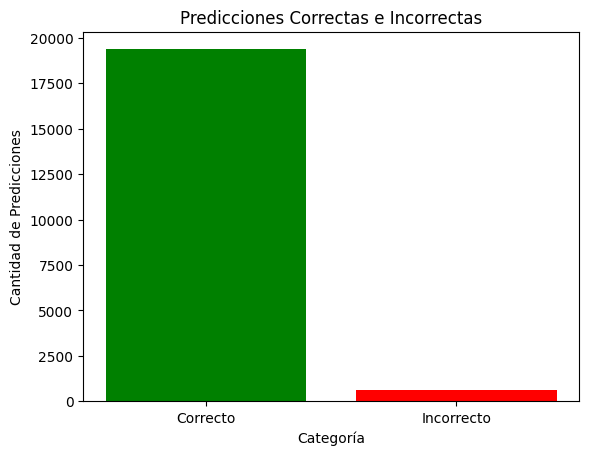

In [78]:
# Obtén las predicciones
# Convierte las predicciones a valores binarios (0 o 1) utilizando un umbral de decisión (por ejemplo, 0.5)

# Hacer predicciones en nuevos datos
predictions = model.predict(X_test)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Compara las predicciones binarias con los valores reales
comparison = (binary_predictions == y_test.values.reshape(-1, 1))
# Calcula la precisión de las predicciones en el conjunto de prueba
accuracy = np.mean(comparison)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
# También puedes contar los casos correctos e incorrectos
correct_predictions = np.sum(comparison)
incorrect_predictions = len(comparison) - correct_predictions
print(f"Predicciones correctas: {correct_predictions}")
print(f"Predicciones incorrectas: {incorrect_predictions}")

#Grafica los valores predichos y los valores reales
# Etiquetas para las barras
labels = ['Correcto', 'Incorrecto']
# Valores correspondientes a las barras
values = [correct_predictions, incorrect_predictions]
# Colores para las barras
colors = ['green', 'red']
# Crea un gráfico de barras
plt.bar(labels, values, color=colors)
# Agrega etiquetas al gráfico
plt.title('Predicciones Correctas e Incorrectas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Predicciones')
plt.xticks(rotation=0)
# Muestra el gráfico
plt.show()


### Matriz de confusión con Test
Se hace una matriz de confusión que muestra la cantidad de predicciones correctas e incorrectas para las clases "No Diabetes" y "Diabetes".

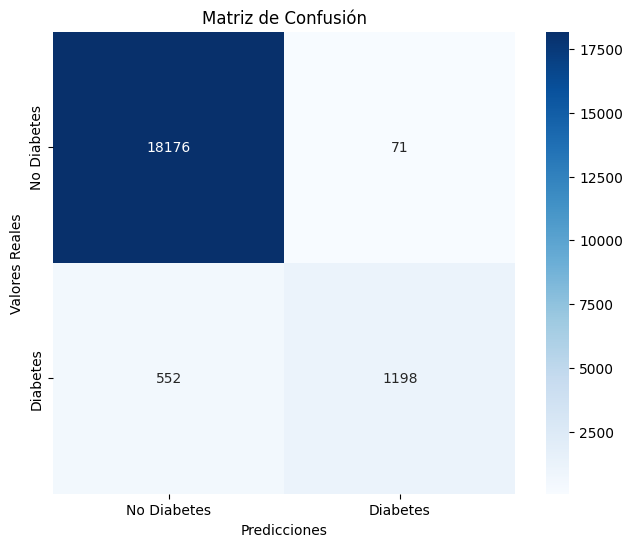

Media de las predicciones: 0.09363234043121338
Varianza de las predicciones: 0.05752243474125862


In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, binary_predictions)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


#Calcula la varianza de las predicciones
# Calcula la media de las predicciones
mean = np.mean(predictions)

# Calcula la varianza de las predicciones
variance = np.var(predictions)

print(f"Media de las predicciones: {mean}")
print(f"Varianza de las predicciones: {variance}")

## Predicciones con nuevos datos (datos de validación)
Se generan las predicciones con los datos de validación y se visualizan las respuestas con el porcentaje de exactitud y una gráfica que compara el numero de predicciones correctas o incorrectas.

625/625 [==============================] - 1s 1ms/step
Precisión en el conjunto de prueba: 97.11%
Predicciones correctas: 19419
Predicciones incorrectas: 577


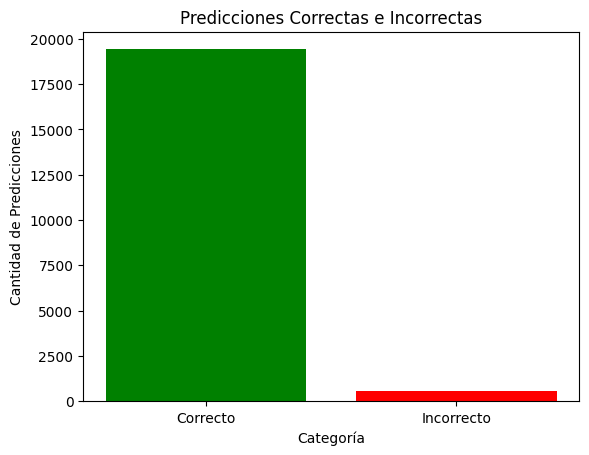

In [80]:
# Obtén las predicciones
# Convierte las predicciones a valores binarios (0 o 1) utilizando un umbral de decisión (por ejemplo, 0.5)

# Hacer predicciones en nuevos datos
predictions = model.predict(X_val)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Compara las predicciones binarias con los valores reales
comparison = (binary_predictions == y_val.values.reshape(-1, 1))
# Calcula la precisión de las predicciones en el conjunto de prueba
accuracy = np.mean(comparison)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
# También puedes contar los casos correctos e incorrectos
correct_predictions = np.sum(comparison)
incorrect_predictions = len(comparison) - correct_predictions
print(f"Predicciones correctas: {correct_predictions}")
print(f"Predicciones incorrectas: {incorrect_predictions}")

#Grafica los valores predichos y los valores reales
# Etiquetas para las barras
labels = ['Correcto', 'Incorrecto']
# Valores correspondientes a las barras
values = [correct_predictions, incorrect_predictions]
# Colores para las barras
colors = ['green', 'red']
# Crea un gráfico de barras
plt.bar(labels, values, color=colors)
# Agrega etiquetas al gráfico
plt.title('Predicciones Correctas e Incorrectas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Predicciones')
plt.xticks(rotation=0)
# Muestra el gráfico
plt.show()


### Matriz de confusión con Test
Se hace una matriz de confusión que muestra la cantidad de predicciones correctas e incorrectas para las clases "No Diabetes" y "Diabetes".

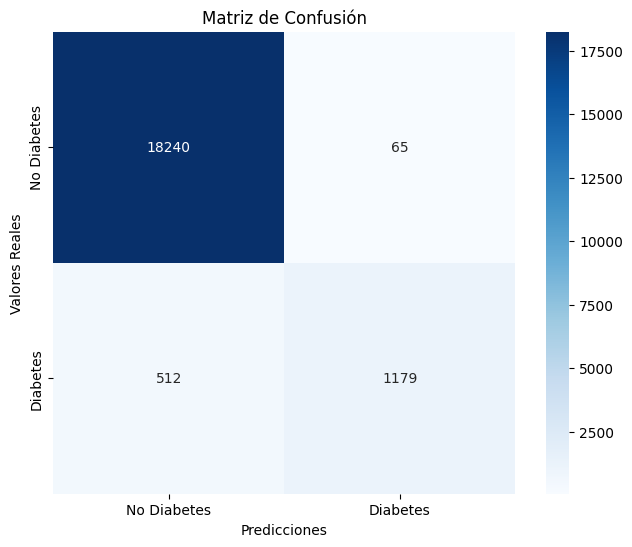

Media de las predicciones: 0.0926479622721672
Varianza de las predicciones: 0.05648387223482132


In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_val, binary_predictions)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


#calcula la varianza

# Calcula la media de las predicciones
mean = np.mean(predictions)

# Calcula la varianza de las predicciones
variance = np.var(predictions)

print(f"Media de las predicciones: {mean}")
print(f"Varianza de las predicciones: {variance}")

## Análisis del sesgo y varianza

La gráfica que se ve es un gráfico de curvas de aprendizaje que representa la precisión (accuracy) del modelo en el conjunto de entrenamiento y en el conjunto de validación a lo largo de las épocas durante el entrenamiento de una red neuronal.

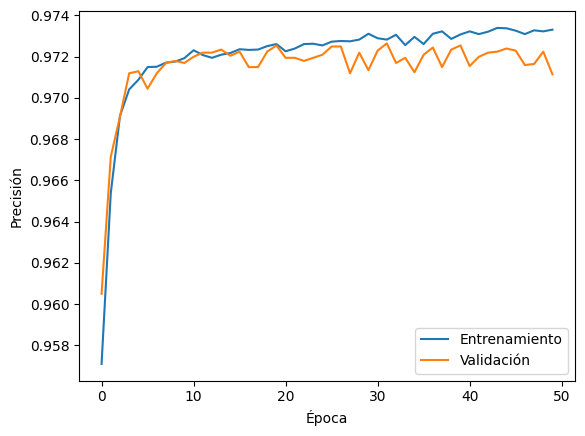

In [62]:
# Gráfico de curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()




## Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto

Después de observar el gráfico de curvas de aprendizaje sabemos que el aprendizaje se está realizando de manera adecuada, ya que con ambos conjuntos de datos, tanto en el de train, como en el de test, el aprendizaje va variando y subiendo, lo que indica que no hay un sesgo considerable. Igualmente el desempeño del modelo en los conjuntos tanto de prueba como de validación que observamos en las pruebas de validación y predicciones, es bueno por lo que indica igualmente que no se está detectando un sesgo importante. Sin embargo, al analizar la matriz de confusión vemos que el número de predicciones acertadas son las mayores, lo cual nos da un buen indicio, sin embargo en cuanto a las predicciones erroneas, en ambas ocaciones vemos un valor mayor en los falsos negativos, lo cual podría significar un problema, considerando más aún la naturaleza del dataset empleado.

## Diagnóstico y explicación el grado de varianza: bajo medio alto
Nuestro objetivo es encontrar un equilibrio entre el sesgo y la varianza, analizando las gráficas previas el grado de varianza no es muy alto, ya que las predicciones que se generan son bastante aceptables. En cuanto al valor de la varianza obtenido en ambos casos, tanto con los valores de test y validation, el cual fué alrededor de 0.05, podemos decir que, el modelo muestra baja variabilidad, lo cual dice que el modelo es estable en sus predicciones pero no demaciado predecible como para generar un overfitting. Tiene una buena generalización de los datos, lo que indica que se conserva un buen rendimiento, este valor puede decirnos que se ha necontrado el valance entre el sesgo y la variabilidad lo cual es indicador de un posible ajuste adecuado.


## Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

Observamos el el conjunto de resultados y gráficas anteriores que el ajuste del modelo es adecuado, ya que no se observa un underfitting o un overfitting, aunque el modelo es más preciso a presentar este último, en este momento no es el caso.
Las curvas de aprendizaje no muestran que el modelo funcione de mejor manera con train y con test deje de funcionar, lo que observamos en un aprendizaje similar en ambos datasets, la curva de entrenamiento es ligeramente más alta pero no demuestra un overfitting significativo. En cuanto a la matriz de confusión vemos que la mayoría de los casos se encuentran en predicciones verdaderas, lo que confirma los niveles de precisión vistos.

